# Data Analysis

This code is specically desgined to visualize the data and understand how is distributed across all variables

## Libraries import

In [5]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Global variables

In [7]:
PATH_DENSITY_REPORT       = 'density_report.csv'
PATH_HISTORICAL_INCIDENTS = 'historical_incidents.csv'
PATH_PRODUCT_ATTRIBUTES   = 'product_attributes.csv'
PATH_SUPPLIER_SCORECARD   = 'supplier_scorecard.csv'

## Execution

### 1. Read files

In [8]:
#  Read CSV files 
df_density_report = pl.read_csv(PATH_DENSITY_REPORT, separator=";")
df_historical_incidents = pl.read_csv(PATH_HISTORICAL_INCIDENTS, separator=";")
df_product_attributes = pl.read_csv(PATH_PRODUCT_ATTRIBUTES, separator=";")
df_supplier_scorecard = pl.read_csv(PATH_SUPPLIER_SCORECARD, separator=";")


# --- Adjust date values for df_density_report ---
print("Adjusting DateOfReport in df_density_report...")
df_density_report = df_density_report.with_columns(
    pl.col("DateOfReport")
      .str.strptime(pl.Date, format="%Y-%m-%d", strict=False) # Parse string directly to Date with the correct format
      .alias("DateOfReport")                                  # Overwrite column (optional)
)
print(f"New dtype: {df_density_report['DateOfReport'].dtype}")
print(df_density_report.head(2)) # Show result


# --- Adjust date values for df_historical_incidents ---
print("\nAdjusting DateOfIncident in df_historical_incidents...")
df_historical_incidents = df_historical_incidents.with_columns(
    pl.col("DateOfIncident")
      .str.strptime(pl.Date, format="%Y-%m-%d", strict=False) # Parse string directly to Date with the correct format
      .alias("DateOfIncident")                                # Overwrite column
)
print(f"New dtype: {df_historical_incidents['DateOfIncident'].dtype}")
print(df_historical_incidents.head(2)) # Show result





Adjusting DateOfReport in df_density_report...
New dtype: Date
shape: (2, 11)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ ReportID  ┆ ProductRe ┆ DateOfRep ┆ SupplierN ┆ … ┆ ProposedU ┆ ProposedF ┆ ProposedL ┆ Packagin │
│ ---       ┆ ference   ┆ ort       ┆ ame       ┆   ┆ nitsPerCa ┆ oldingMet ┆ ayout     ┆ gQuality │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ rton      ┆ hod       ┆ ---       ┆ ---      │
│           ┆ str       ┆ date      ┆ str       ┆   ┆ ---       ┆ ---       ┆ str       ┆ str      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ str       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ RPT000000 ┆ PRD07271  ┆ 2024-03-0 ┆ SupplierA ┆ … ┆ 29.0      ┆ Method2   ┆ LayoutC   ┆ Good     │
│ 1         ┆           ┆ 4         ┆           ┆   ┆           ┆           ┆           ┆          │
│ RPT000000 ┆

### 2. Density report

#### 2.1 Data preview

In [9]:
df_density_report.head(10)

ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
str,str,date,str,str,str,f64,f64,str,str,str
"""RPT0000001""","""PRD07271""",2024-03-04,"""SupplierA""","""Pants""","""Polyester""",0.35,29.0,"""Method2""","""LayoutC""","""Good"""
"""RPT0000002""","""PRD00861""",2024-05-27,"""SupplierC""","""T-Shirt""","""Denim""",0.21,20.0,"""Method2""","""LayoutB""","""Good"""
"""RPT0000003""","""PRD05391""",2023-11-18,"""SupplierA""","""Shirt""","""Cotton""",0.2,31.0,"""Method1""","""LayoutA""","""Good"""
"""RPT0000004""","""PRD05192""",2024-06-13,"""SupplierA""","""Coat""","""Cotton""",1.3,5.0,"""Method1""","""LayoutD""","""Good"""
"""RPT0000005""","""PRD05735""",2023-07-18,"""SupplierA""","""Coat""","""Polyester""",1.11,9.0,"""Method2""","""LayoutD""","""Good"""
"""RPT0000006""","""PRD06266""",2024-04-01,"""SupplierC""","""Dress""","""Linen""",0.53,18.0,"""Method3""","""LayoutC""","""Good"""
"""RPT0000007""","""PRD00467""",2023-12-02,"""SupplierD""","""Pants""","""Polyester""",0.36,22.0,"""Method1""","""LayoutC""","""Good"""
"""RPT0000008""","""PRD04427""",2023-11-28,"""SupplierA""","""Pants""","""Wool""",0.49,25.0,"""Method3""","""LayoutC""","""Good"""
"""RPT0000009""","""PRD05579""",2023-08-29,"""SupplierB""","""Blouse""","""Linen""",0.21,0.0,"""Method2""","""LayoutA""","""Good"""


#### 2.2 Data basic summary

In [10]:
df_density_report.describe()

statistic,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
str,str,str,str,str,str,str,f64,f64,str,str,str
"""count""","""500000""","""492348""","""500000""","""500000""","""500000""","""500000""",500000.0,500000.0,"""500000""","""500000""","""500000"""
"""null_count""","""0""","""7652""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0"""
"""mean""",null,null,"""2023-09-30 15:58:47.712000""",null,null,null,0.461021,24.75393,null,null,null
"""std""",null,null,null,null,null,null,0.349694,11.169403,null,null,null
"""min""","""RPT0000001""","""PRD00001""","""2023-01-01""","""SupplierA""","""Blouse""","""Cotton""",0.08,0.0,"""FoldX""","""Box9""","""Bad"""
"""25%""",null,null,"""2023-05-17""",null,null,null,0.21,16.0,null,null,null
"""50%""",null,null,"""2023-09-30""",null,null,null,0.33,25.0,null,null,null
"""75%""",null,null,"""2024-02-14""",null,null,null,0.62,32.0,null,null,null
"""max""","""RPT0500000""","""PRD10000""","""2024-06-30""","""SupplierH""","""T-Shirt""","""Wool""",2.32,49.0,"""Method3""","""LayoutX""","""Uncertain"""


#### 2.3 Suppliers distribution

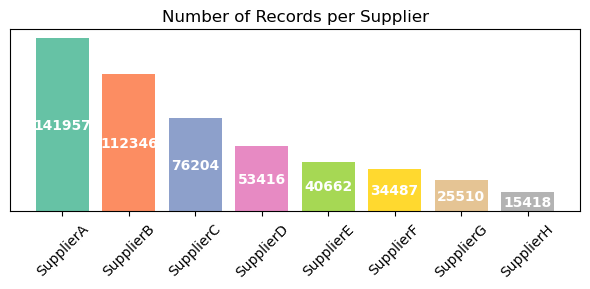

In [11]:
# Group and sort alphabetically
df_counts = df_density_report.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_pd = df_counts.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_pd["SupplierName"], df_counts_pd["NumRecords"], color=colors[:len(df_counts_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 2.4 Suppliers distribution over the time

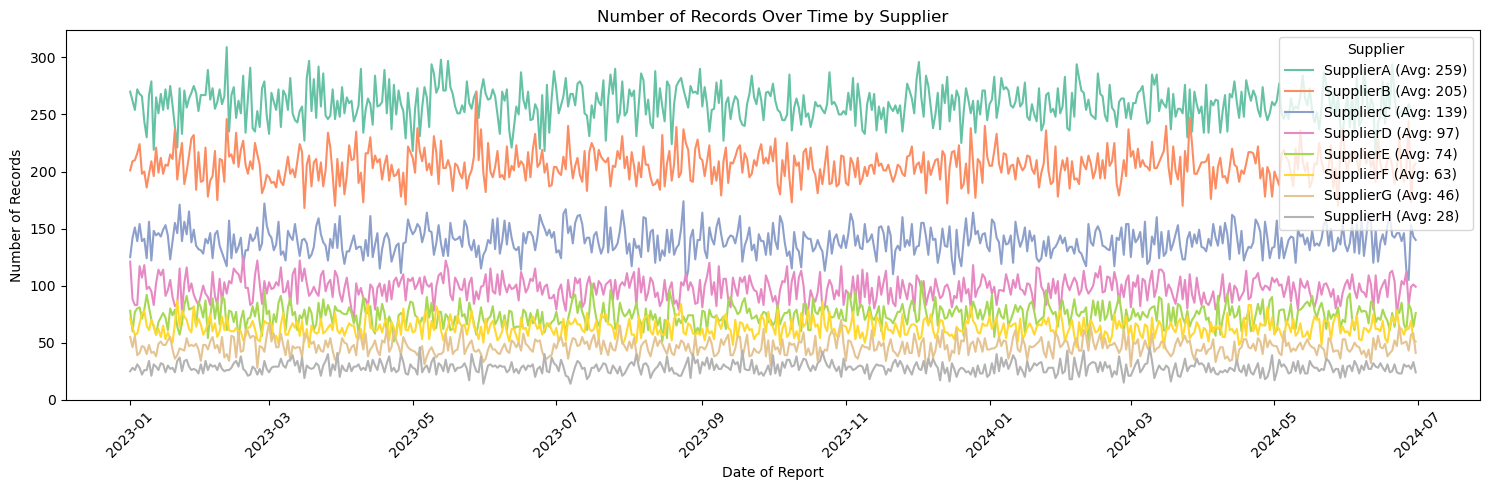

In [12]:
# Group by Date and Supplier, count
df_time_counts = df_density_report.group_by(["DateOfReport", "SupplierName"]).agg([
    pl.len().alias("NumRecords")
])

# Convert to pandas and pivot
df_time_pd = df_time_counts.to_pandas()
df_time_pivot = df_time_pd.pivot_table(index="DateOfReport", columns="SupplierName", values="NumRecords", fill_value=0)

# Sort by date
df_time_pivot = df_time_pivot.sort_index()

# Use same colors as before
supplier_names = df_time_pivot.columns.tolist()
colors = plt.cm.Set2.colors
num_colors = len(colors)
color_map = {supplier: colors[i % num_colors] for i, supplier in enumerate(supplier_names)}

# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot[supplier].mean()
    label = f"{supplier} (Avg: {int(avg)})"
    plt.plot(df_time_pivot.index, df_time_pivot[supplier], label=label, color=color_map[supplier])

# Final touches
plt.title("Number of Records Over Time by Supplier")
plt.xlabel("Date of Report")
plt.ylabel("Number of Records")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

#### 2.5 Garment distribution per supplier

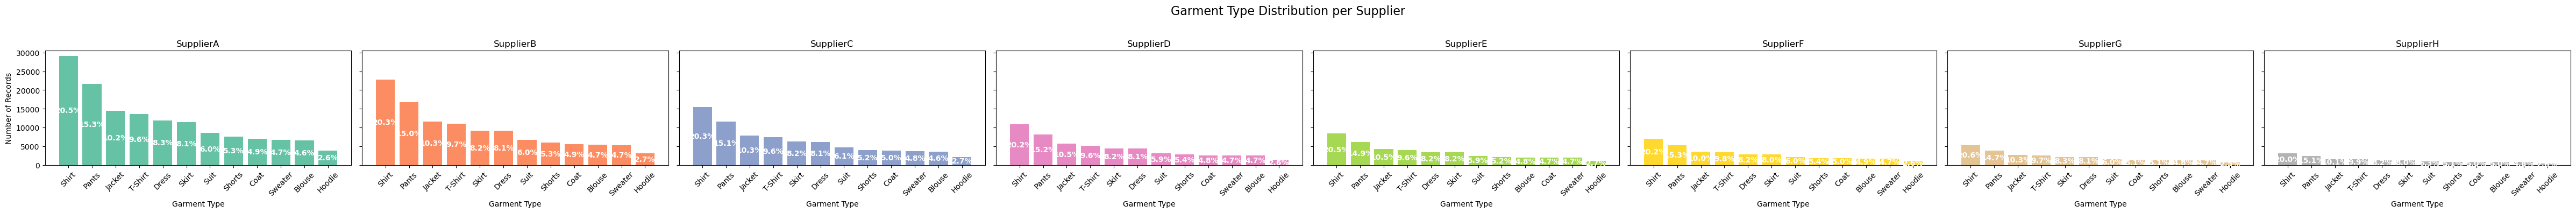

In [13]:
# Group by Supplier + GarmentType and count
df_garments = df_density_report.group_by(["SupplierName", "GarmentType"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier to compute percentages
total_counts = df_garments.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Add percentage column
df_garments["Percentage"] = df_garments.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_garments["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(6 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
# Use modulo operator to cycle through colors if there are more suppliers than colors
color_map = {supplier: colors[i % len(colors)] for i, supplier in enumerate(suppliers)}

# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_garments[df_garments["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["GarmentType"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Garment Type")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Garment Type Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.6 Material distribution per supplier

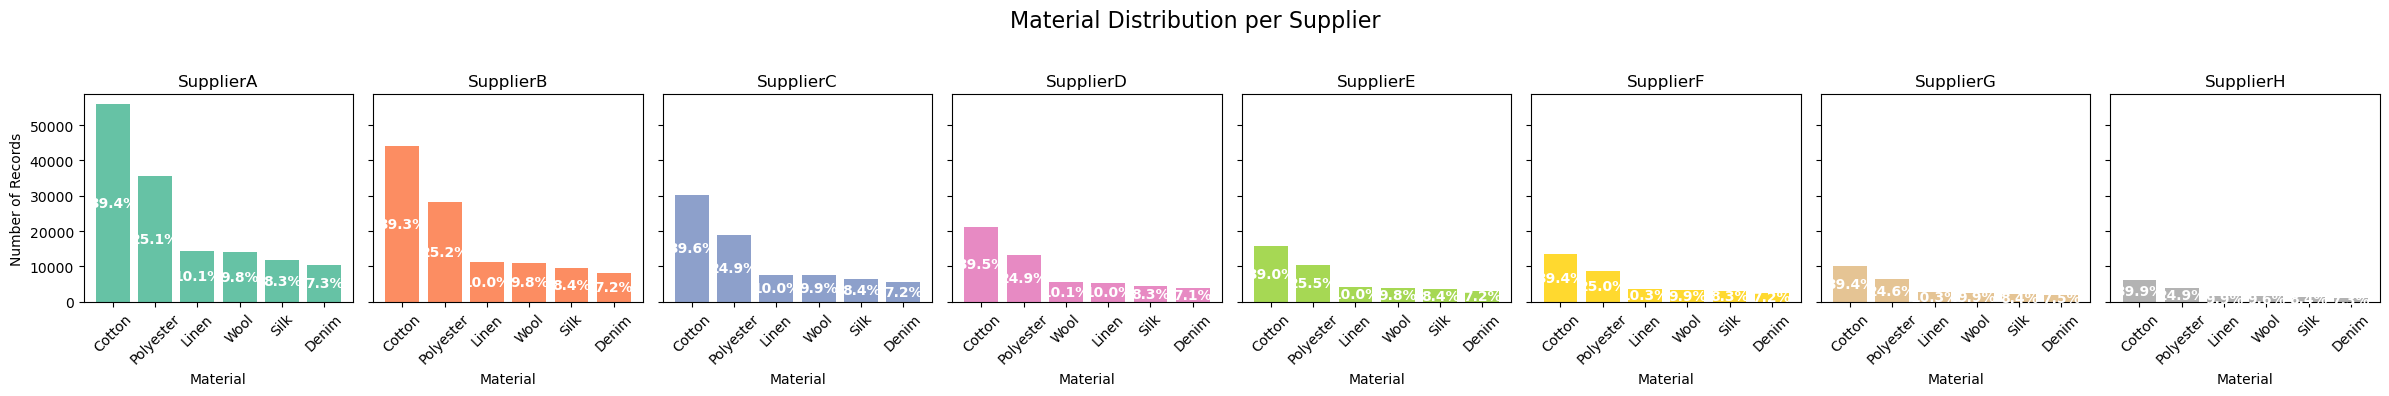

In [14]:
# Group by Supplier + Material and count
df_materials = df_density_report.group_by(["SupplierName", "Material"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier
total_counts = df_materials.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Compute percentages
df_materials["Percentage"] = df_materials.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Step 4: Prepare subplots
suppliers = sorted(df_materials["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
# Use modulo operator to cycle through colors if there are more suppliers than colors
color_map = {supplier: colors[i % len(colors)] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_materials[df_materials["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["Material"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Material")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final layout
plt.suptitle("Material Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.6 Units proposed per garment

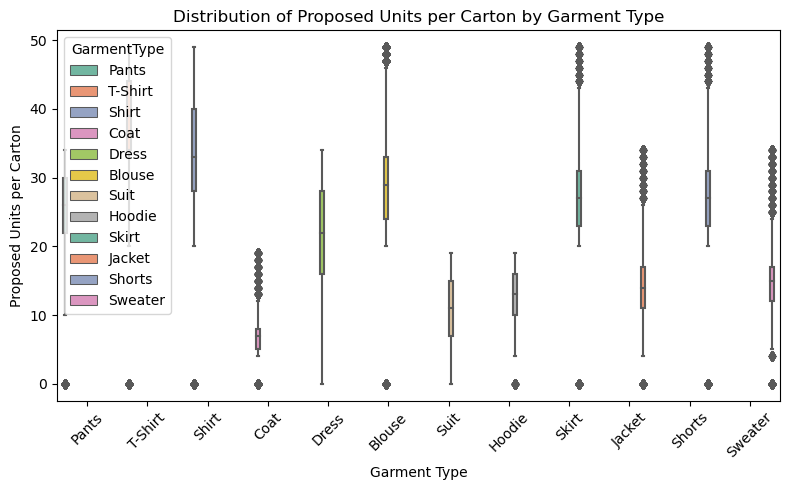

In [15]:
# Convert to pandas
df_box = df_density_report.select(["GarmentType", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="GarmentType",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="GarmentType",
    palette="Set2"
)

plt.title("Distribution of Proposed Units per Carton by Garment Type")
plt.xlabel("Garment Type")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.7 Units proposed per folding method

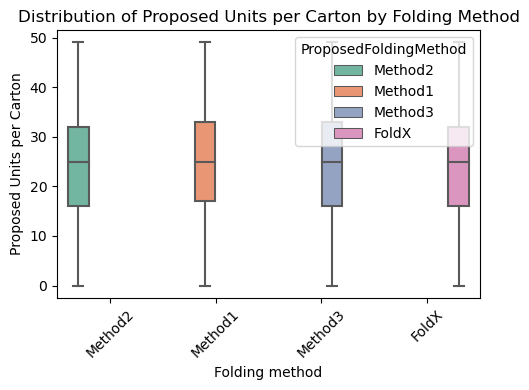

In [16]:
# Convert to pandas
df_box = df_density_report.select(["ProposedFoldingMethod", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(
    x="ProposedFoldingMethod",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="ProposedFoldingMethod",
    palette="Set2"
)

plt.title("Distribution of Proposed Units per Carton by Folding Method")
plt.xlabel("Folding method")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.8 Units proposed per layout

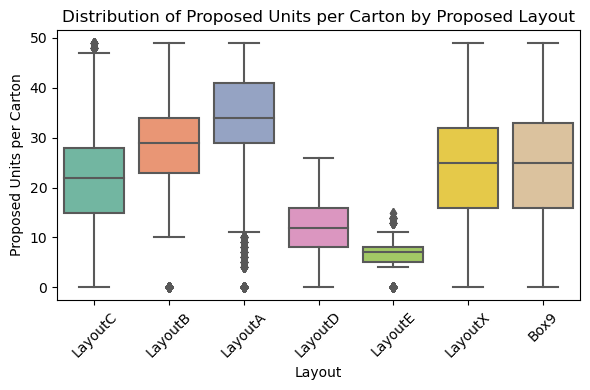

In [17]:
# Convert to pandas
df_box = df_density_report.select(["ProposedLayout", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="ProposedLayout",
    y="ProposedUnitsPerCarton",
    data=df_box,
    # hue="ProposedLayout", # Removed hue as x already separates categories
    palette="Set2"
    # legend=False # Removed unsupported legend argument
)

plt.title("Distribution of Proposed Units per Carton by Proposed Layout")
plt.xlabel("Layout")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.9 Packing quality per supplier

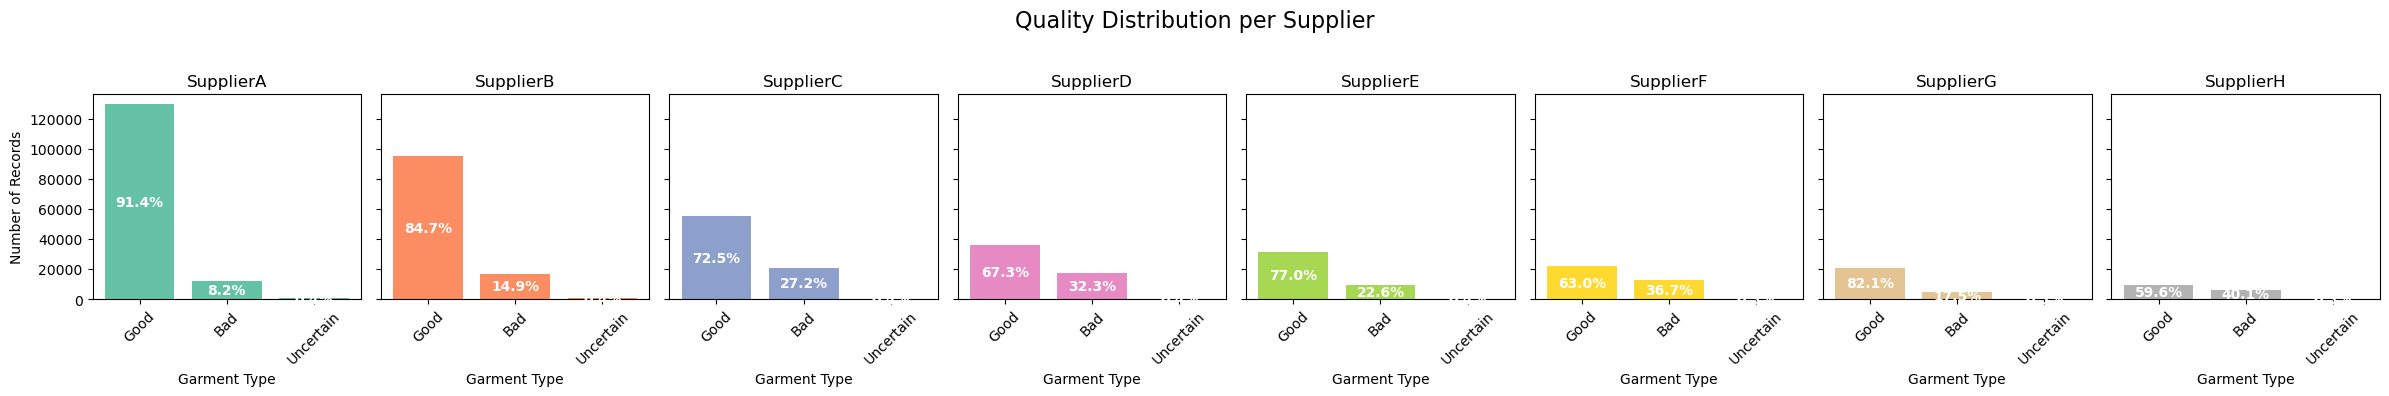

In [18]:
# Group by Supplier + PackagingQuality and count
df_garments = df_density_report.group_by(["SupplierName", "PackagingQuality"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier to compute percentages
total_counts = df_garments.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Add percentage column
df_garments["Percentage"] = df_garments.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_garments["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
# Use modulo operator to cycle through colors if there are more suppliers than colors
color_map = {supplier: colors[i % len(colors)] for i, supplier in enumerate(suppliers)}

# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_garments[df_garments["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["PackagingQuality"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Garment Type")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Quality Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 3. Historical incidents

#### 3.1 Data preview

In [19]:
df_historical_incidents.head(10)

ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€)
str,str,date,str,str,f64
"""PRD08586""","""SupplierC""",2023-10-25,"""Other""","""Resolved""",69.0
"""PRD06004""","""SupplierA""",2024-03-07,"""Packaging Damage""","""Resolved""",1912.0
"""PRD04841""","""SupplierC""",2023-01-19,"""Missing Items""","""Resolved""",379.0
"""PRD02036""","""SupplierC""",2024-05-28,"""Other""","""In Progress""",327.0
"""PRD02537""","""SupplierE""",2023-08-11,"""Incorrect Folding""","""Not Resolved""",560.0
"""PRD07198""","""SupplierB""",2023-05-16,"""Other""","""Resolved""",71.0
"""PRD02419""","""SupplierF""",2024-01-24,"""Labeling Error""","""Not Resolved""",420.0
"""PRD02815""","""SupplierA""",2024-06-03,"""Other""","""In Progress""",260.0
"""PRD01628""","""SupplierC""",2024-02-24,"""Other""","""Resolved""",323.0


#### 3.2 Data basic summary

In [20]:
df_historical_incidents.describe()

statistic,ProductReference,SupplierName,DateOfIncident,IssueDescription,ResolutionStatus,CostImpact (€)
str,str,str,str,str,str,f64
"""count""","""17699""","""18000""","""18000""","""18000""","""18000""",18000.0
"""null_count""","""301""","""0""","""0""","""0""","""0""",0.0
"""mean""",null,null,"""2023-10-08 17:32:38.400000""",null,null,555.215833
"""std""",null,null,null,null,null,492.948178
"""min""","""PRD00001""","""SupplierA""","""2023-01-01""","""Incorrect Folding""","""In Progress""",50.0
"""25%""",null,null,"""2023-05-25""",null,null,224.0
"""50%""",null,null,"""2023-10-09""",null,null,365.0
"""75%""",null,null,"""2024-02-24""",null,null,693.75
"""max""","""PRD09999""","""SupplierH""","""2024-07-14""","""Transportation Damage""","""Resolved""",2500.0


#### 3.3 Suppliers distribution

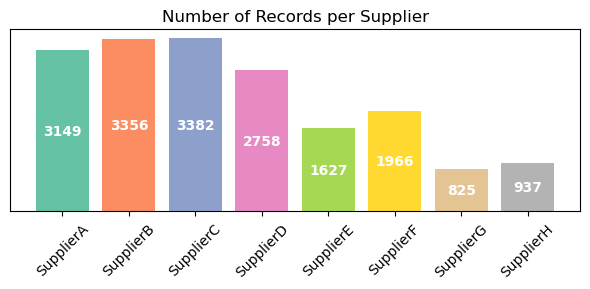

In [21]:
# Group and sort alphabetically
df_counts = df_historical_incidents.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_pd = df_counts.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_pd["SupplierName"], df_counts_pd["NumRecords"], color=colors[:len(df_counts_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 3.4 Suppliers distribution over the time

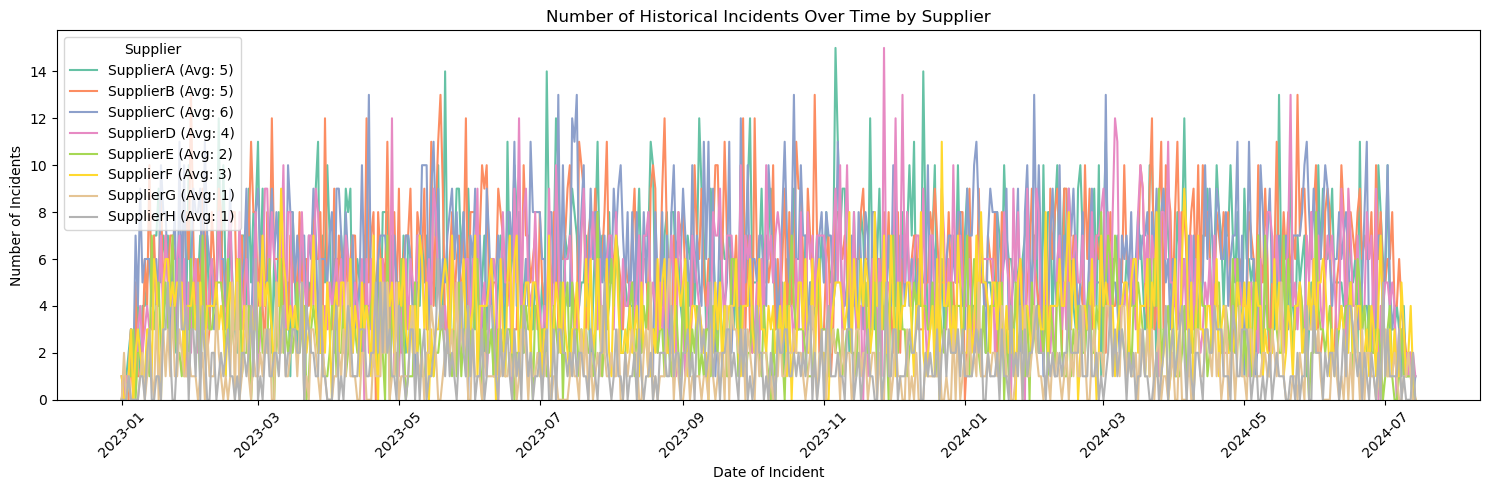

In [22]:
# Group by Date and Supplier, count
df_time_counts = df_historical_incidents.group_by(["DateOfIncident", "SupplierName"]).agg([
    pl.len().alias("NumRecords")
])

# Convert to pandas and pivot
df_time_pd = df_time_counts.to_pandas()
df_time_pivot = df_time_pd.pivot_table(index="DateOfIncident", columns="SupplierName", values="NumRecords", fill_value=0)

# Sort by date
df_time_pivot = df_time_pivot.sort_index()

# Use same colors as before, cycling through if needed
supplier_names = df_time_pivot.columns.tolist()
colors = plt.cm.Set2.colors
num_colors = len(colors)
color_map = {supplier: colors[i % num_colors] for i, supplier in enumerate(supplier_names)}

# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot[supplier].mean()
    label = f"{supplier} (Avg: {int(avg)})"
    plt.plot(df_time_pivot.index, df_time_pivot[supplier], label=label, color=color_map[supplier])
# Final touches
plt.title("Number of Historical Incidents Over Time by Supplier")
plt.xlabel("Date of Incident")
plt.ylabel("Number of Incidents")
plt.legend(title="Supplier")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

#### 3.5 Incident types per supplier

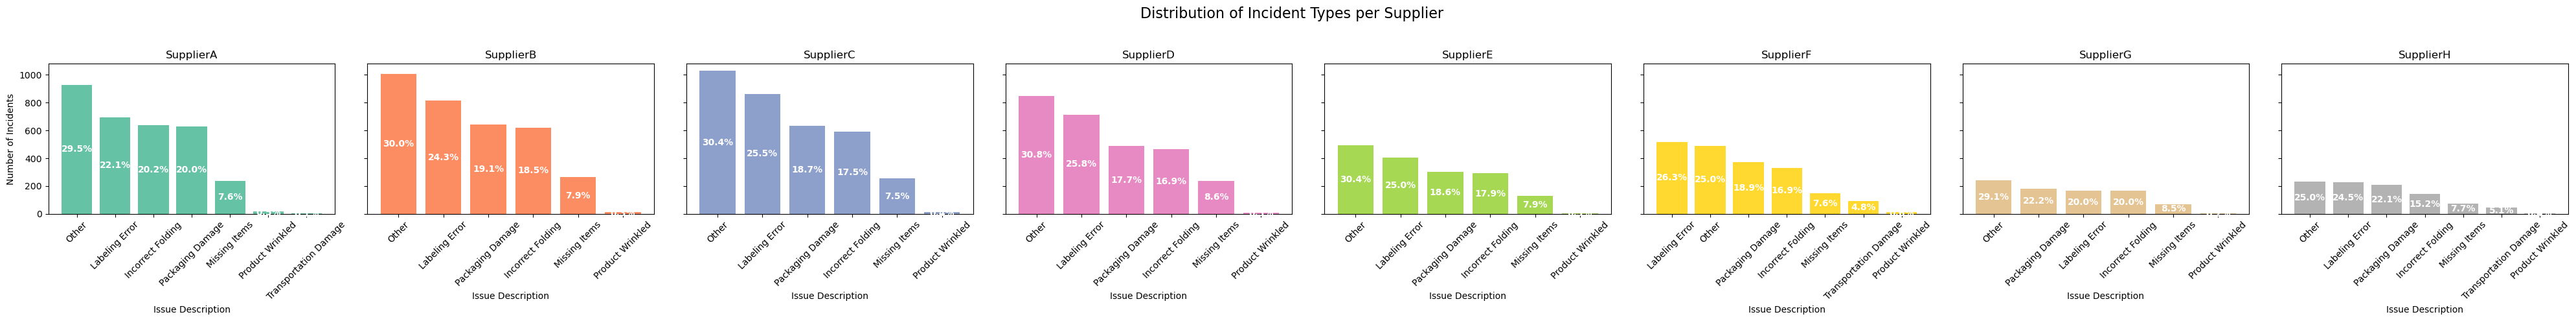

In [23]:
# Group by Supplier + IssueDescription and count
df_issues = df_historical_incidents.group_by(["SupplierName", "IssueDescription"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Calculate total per supplier to get % values
total_issues = df_issues.groupby("SupplierName")["NumRecords"].sum().to_dict()
df_issues["Percentage"] = df_issues.apply(
    lambda row: row["NumRecords"] / total_issues[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_issues["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)

colors = plt.cm.Set2.colors
# Use modulo operator to cycle through colors if there are more suppliers than colors
color_map = {supplier: colors[i % len(colors)] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_issues[df_issues["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["IssueDescription"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Issue Description")
    if i == 0:
        ax.set_ylabel("Number of Incidents")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final layout
plt.suptitle("Distribution of Incident Types per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 3.6 Status per supplier

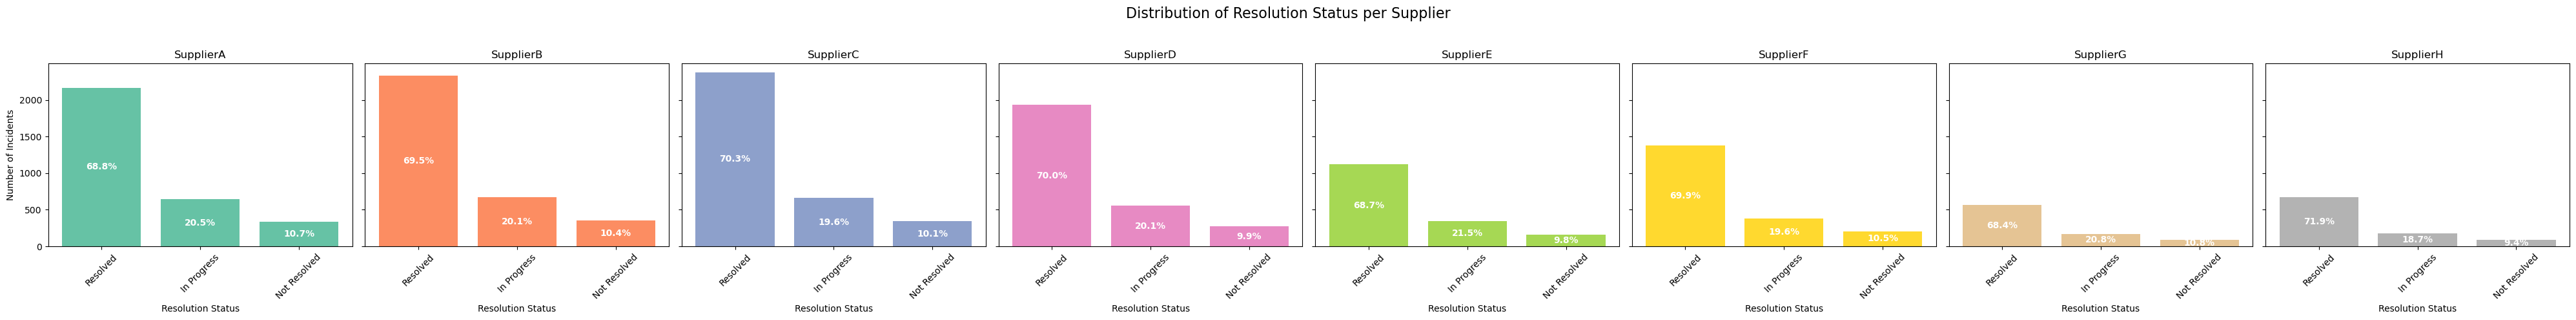

In [24]:
# Group by Supplier + ResolutionStatus and count
df_resolution = df_historical_incidents.group_by(["SupplierName", "ResolutionStatus"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Calculate total per supplier
total_by_supplier = df_resolution.groupby("SupplierName")["NumRecords"].sum().to_dict()
df_resolution["Percentage"] = df_resolution.apply(
    lambda row: row["NumRecords"] / total_by_supplier[row["SupplierName"]] * 100, axis=1
)

# Set up subplots
suppliers = sorted(df_resolution["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)

colors = plt.cm.Set2.colors
# Use modulo operator to cycle through colors if there are more suppliers than colors
color_map = {supplier: colors[i % len(colors)] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_resolution[df_resolution["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["ResolutionStatus"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Resolution Status")
    if i == 0:
        ax.set_ylabel("Number of Incidents")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Distribution of Resolution Status per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 3.7 Cost impact by supplier

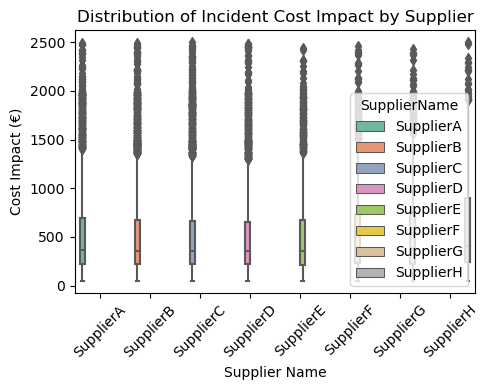

In [25]:
# Convert to pandas and sort alphabetically by SupplierName
# Select the correct column name 'CostImpact (€)'
df_cost = df_historical_incidents.select(["SupplierName", "CostImpact (€)"]).to_pandas()
# Rename the column for easier access in plotting
df_cost = df_cost.rename(columns={"CostImpact (€)": "CostImpact"})
df_cost = df_cost.sort_values(by="SupplierName")

# Get sorted supplier list for consistent order in boxplot
supplier_order = sorted(df_cost["SupplierName"].unique())

# Plot boxplot with custom order
plt.figure(figsize=(5, 4))
sns.boxplot(
    x="SupplierName",
    y="CostImpact",
    data=df_cost,
    order=supplier_order,
    hue="SupplierName",
    palette="Set2"
) # Added closing parenthesis

# Labels and layout
plt.title("Distribution of Incident Cost Impact by Supplier")
plt.xlabel("Supplier Name")
plt.ylabel("Cost Impact (€)") # Updated label to reflect the currency symbol in the data
plt.xticks(rotation=45)
plt.tight_layout()
# Removed duplicate lines below
plt.show()

### 4. Supplier Scorecard

In [26]:
df_supplier_scorecard.head(10)

SupplierName,Month,PackagesHandled,TotalIncidents,AnomaliesDetected,BadPackagingRate (%),OnTimeDeliveryRate (%),AverageCostPerIncident (€)
str,str,i64,i64,i64,f64,f64,f64
"""SupplierG""","""2023-10""",1485,48,5,18.59,80.63,615.83
"""SupplierH""","""2023-09""",865,57,11,38.62,61.7,563.93
"""SupplierE""","""2024-03""",2323,117,14,23.85,74.81,556.93
"""SupplierD""","""2023-07""",3004,156,32,32.86,67.72,513.42
"""SupplierC""","""2023-02""",3854,169,34,27.51,71.65,546.07
"""SupplierC""","""2023-04""",4038,179,32,26.79,70.75,539.83
"""SupplierH""","""2023-07""",815,52,10,35.22,62.72,510.79
"""SupplierC""","""2023-11""",4204,167,42,26.76,73.22,461.73
"""SupplierC""","""2024-02""",3978,173,39,27.3,67.83,559.75


#### 4.2 Data basic summary

In [27]:
df_supplier_scorecard.describe()

statistic,SupplierName,Month,PackagesHandled,TotalIncidents,AnomaliesDetected,BadPackagingRate (%),OnTimeDeliveryRate (%),AverageCostPerIncident (€)
str,str,str,f64,f64,f64,f64,f64,f64
"""count""","""144""","""144""",144.0,144.0,144.0,144.0,144.0,144.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,null,3472.222222,123.263889,20.472222,24.938264,73.670903,564.082778
"""std""",null,null,2328.826504,55.85458,9.587976,10.491566,9.797627,59.892018
"""min""","""SupplierA""","""2023-01""",779.0,29.0,2.0,7.67,60.63,421.43
"""25%""",null,null,1739.0,67.0,13.0,15.84,64.14,522.59
"""50%""",null,null,2788.0,122.0,20.0,26.29,72.29,553.46
"""75%""",null,null,4463.0,175.0,29.0,33.66,81.84,601.26
"""max""","""SupplierH""","""2024-06""",8209.0,215.0,43.0,43.48,96.46,765.74


#### 4.3 Suppliers distribution

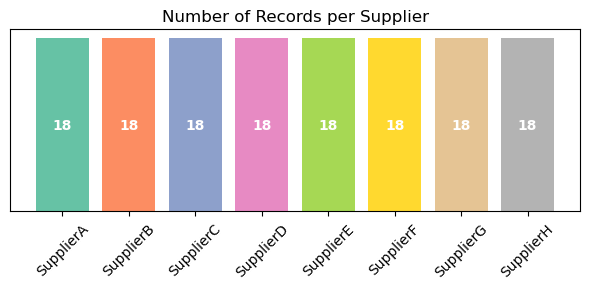

In [28]:
# Group and sort alphabetically
df_counts_supplier = df_supplier_scorecard.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_supplier_pd = df_counts_supplier.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_supplier_pd["SupplierName"], df_counts_supplier_pd["NumRecords"], color=colors[:len(df_counts_supplier_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 4.4 On time delivery by supplier

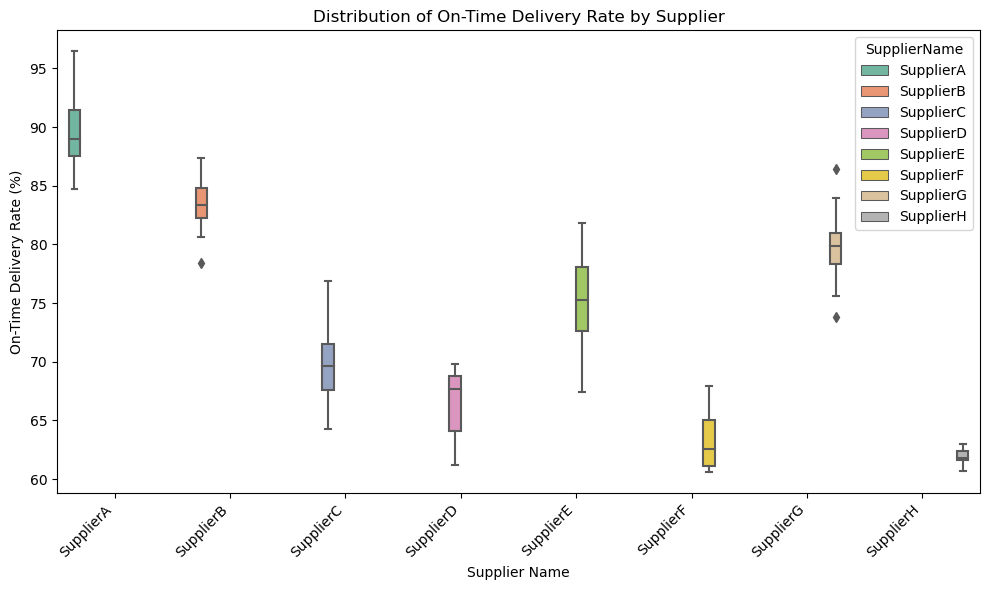

In [29]:
# Visualize the distribution of On-Time Delivery Rate for each supplier using a box plot

# Select relevant columns and convert to pandas
df_ontime_pd = df_supplier_scorecard.select(["SupplierName", "OnTimeDeliveryRate (%)"]).to_pandas()

# Rename column for easier access
df_ontime_pd = df_ontime_pd.rename(columns={"OnTimeDeliveryRate (%)": "OnTimeDeliveryRate"})

# Sort by SupplierName for consistent plotting order
df_ontime_pd = df_ontime_pd.sort_values(by="SupplierName")
supplier_order = sorted(df_ontime_pd["SupplierName"].unique())

# Plot boxplot
plt.figure(figsize=(10, 6)) # Adjusted figure size for better readability
sns.boxplot(
    x="SupplierName",
    y="OnTimeDeliveryRate",
    data=df_ontime_pd,
    order=supplier_order,
    hue="SupplierName", # Use hue to assign different colors per supplier
    palette="Set2" # Use a color palette
    # legend=False # Removed unsupported legend argument
)

# Add labels and title
plt.title("Distribution of On-Time Delivery Rate by Supplier")
plt.xlabel("Supplier Name")
plt.ylabel("On-Time Delivery Rate (%)")
plt.xticks(rotation=45, ha='right') # Rotate labels for better visibility
plt.tight_layout()
plt.show()

#### 4.5 Bad packaging rate by Supplier 

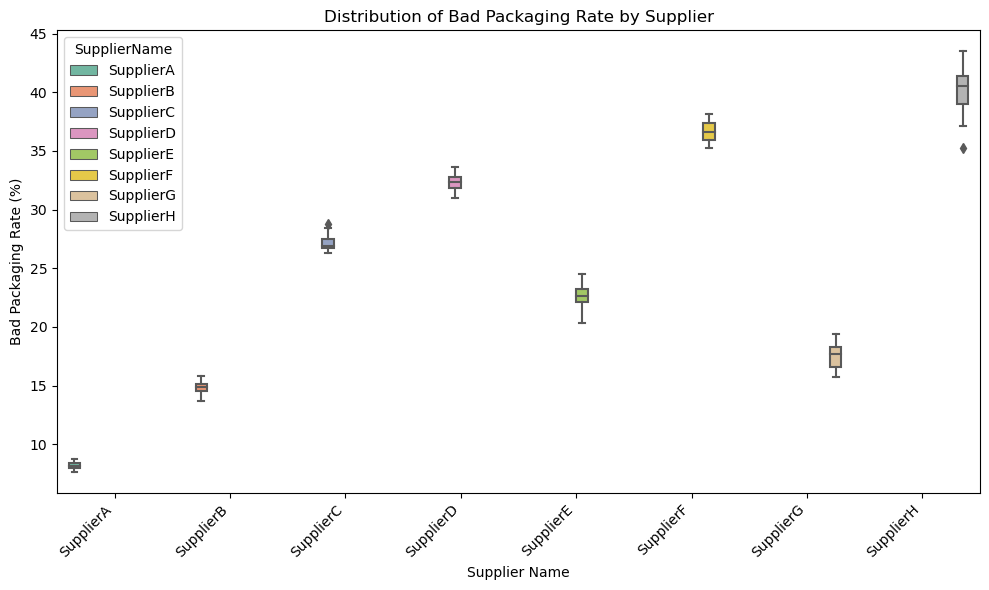


Average Bad Packaging Rate per Supplier:
SupplierName  AverageBadPackagingRate
   SupplierH                40.073889
   SupplierF                36.662778
   SupplierD                32.317222
   SupplierC                27.195556
   SupplierE                22.615000
   SupplierG                17.524444
   SupplierB                14.887222
   SupplierA                 8.230000


In [30]:
# Visualize the distribution of Bad Packaging Rate for each supplier using a box plot

# Select relevant columns and convert to pandas
df_bad_packaging_pd = df_supplier_scorecard.select(["SupplierName", "BadPackagingRate (%)"]).to_pandas()

# Rename column for easier access
df_bad_packaging_pd = df_bad_packaging_pd.rename(columns={"BadPackagingRate (%)": "BadPackagingRate"})

# Sort by SupplierName for consistent plotting order
df_bad_packaging_pd = df_bad_packaging_pd.sort_values(by="SupplierName")
supplier_order = sorted(df_bad_packaging_pd["SupplierName"].unique())

# Plot boxplot
plt.figure(figsize=(10, 6)) # Adjusted figure size
sns.boxplot(
    x="SupplierName",
    y="BadPackagingRate",
    data=df_bad_packaging_pd,
    order=supplier_order,
    hue="SupplierName", # Use hue to assign different colors per supplier
    palette="Set2" # Use a color palette
    # legend=False # Removed unsupported legend argument
)

# Add labels and title
plt.title("Distribution of Bad Packaging Rate by Supplier")
plt.xlabel("Supplier Name")
plt.ylabel("Bad Packaging Rate (%)")
plt.xticks(rotation=45, ha='right') # Rotate labels for better visibility
plt.tight_layout()
plt.show()

# Calculate and print average bad packaging rate per supplier
df_bad_packaging_avg = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.mean("BadPackagingRate (%)").alias("AverageBadPackagingRate") # Use a descriptive alias
]).to_pandas()
df_bad_packaging_avg = df_bad_packaging_avg.sort_values(by="AverageBadPackagingRate", ascending=False) # Sort by the calculated average
print("\nAverage Bad Packaging Rate per Supplier:")
print(df_bad_packaging_avg.to_string(index=False))

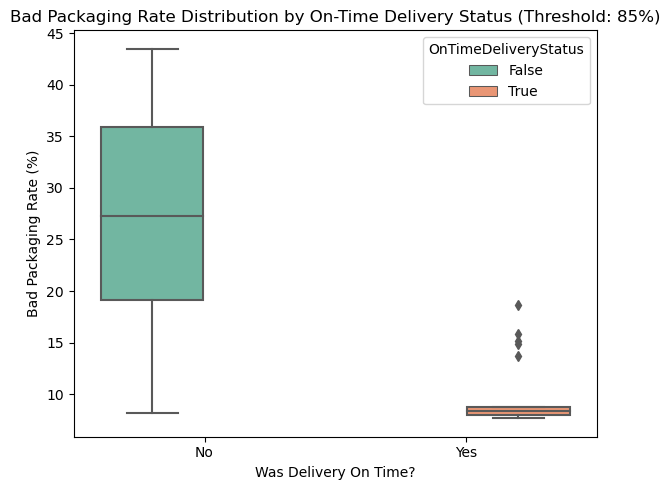


Average Bad Packaging Rate by On Time Delivery Status (Threshold: 85%):
OnTimeDeliveryStatus  AvgBadPackagingRate
                  No            27.647459
                 Yes             9.914545


In [31]:
# Analyze Bad Packaging Rate based on On-Time Delivery status

# Define threshold for On-Time Delivery
ON_TIME_THRESHOLD = 85 # Example threshold: 85%

# Add a boolean column indicating if delivery was on time
df_analysis = df_supplier_scorecard.with_columns(
    (pl.col("OnTimeDeliveryRate (%)") >= ON_TIME_THRESHOLD).alias("OnTimeDeliveryStatus")
)

# Convert to pandas for plotting with seaborn
df_analysis_pd = df_analysis.select(["OnTimeDeliveryStatus", "BadPackagingRate (%)"]).to_pandas()

# Rename column for easier plotting
df_analysis_pd = df_analysis_pd.rename(columns={"BadPackagingRate (%)": "BadPackagingRate"})

# Plot distribution using boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(
    x="OnTimeDeliveryStatus",
    y="BadPackagingRate",
    data=df_analysis_pd,
    hue="OnTimeDeliveryStatus", # Color boxes based on status
    palette="Set2",
    # legend=False # Removed unsupported legend argument
)

# Add labels and title
plt.title(f"Bad Packaging Rate Distribution by On-Time Delivery Status (Threshold: {ON_TIME_THRESHOLD}%)")
plt.xlabel("Was Delivery On Time?")
plt.ylabel("Bad Packaging Rate (%)")
plt.xticks([False, True], ['No', 'Yes']) # Label x-axis ticks
plt.tight_layout()
plt.show()

# Calculate average Bad Packaging Rate based on On-Time Delivery status
df_avg_packaging_ontime = df_analysis.group_by("OnTimeDeliveryStatus").agg([
    pl.mean("BadPackagingRate (%)").alias("AvgBadPackagingRate")
]).to_pandas()

# Map boolean to Yes/No for better readability
df_avg_packaging_ontime["OnTimeDeliveryStatus"] = df_avg_packaging_ontime["OnTimeDeliveryStatus"].map({True: 'Yes', False: 'No'})

# Sort for consistent output (optional)
df_avg_packaging_ontime = df_avg_packaging_ontime.sort_values(by="OnTimeDeliveryStatus")

print(f"\nAverage Bad Packaging Rate by On Time Delivery Status (Threshold: {ON_TIME_THRESHOLD}%):")
print(df_avg_packaging_ontime.to_string(index=False))

#### 4.6 Number of reminders by Supplier 

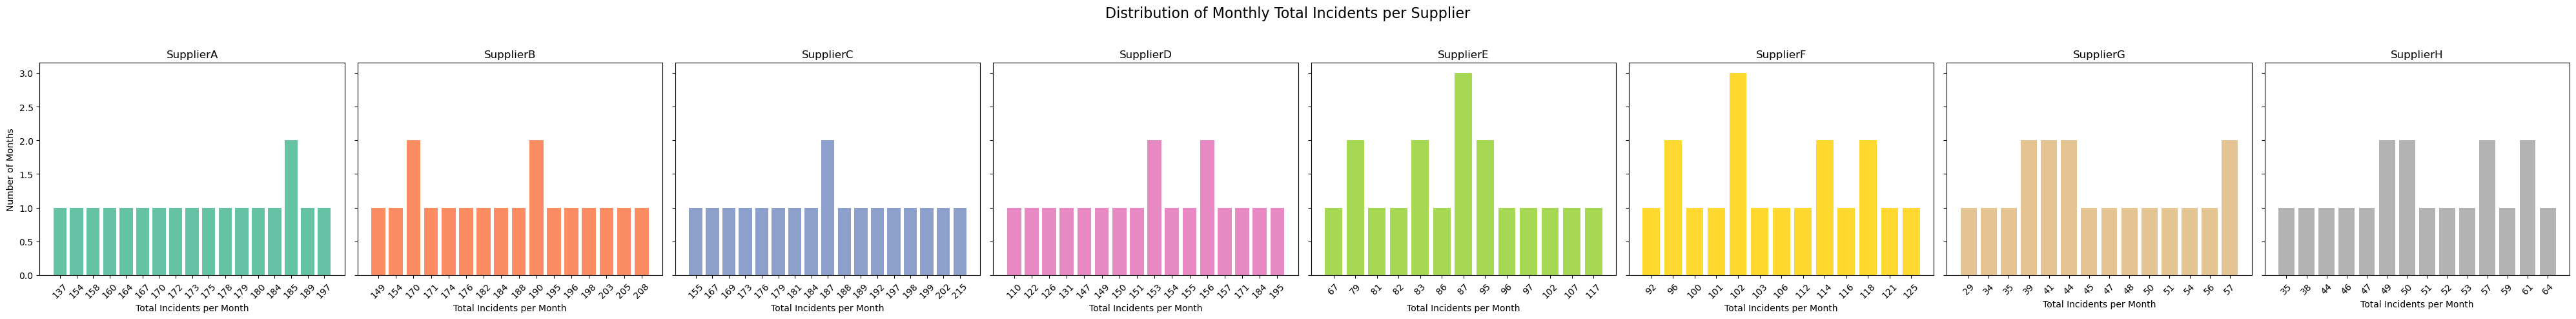

Average Monthly Total Incidents per Supplier:
SupplierName  AvgTotalIncidents
   SupplierC         185.444444
   SupplierB         183.500000
   SupplierA         172.611111
   SupplierD         151.111111
   SupplierF         107.666667
   SupplierE          89.444444
   SupplierH          51.277778
   SupplierG          45.055556

Total Incidents Sum per Supplier (over all months):
SupplierName  TotalIncidentsSum
   SupplierC               3338
   SupplierB               3303
   SupplierA               3107
   SupplierD               2720
   SupplierF               1938
   SupplierE               1610
   SupplierH                923
   SupplierG                811


In [32]:
# Analyze TotalIncidents by supplier
df_incidents = df_supplier_scorecard.group_by(["SupplierName", "TotalIncidents"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Calculate total records per supplier (number of months recorded)
total_records = df_incidents.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Calculate percentage of months with a specific incident count
df_incidents["Percentage"] = df_incidents.apply(
    lambda row: row["NumRecords"] / total_records[row["SupplierName"]] * 100, axis=1
)

# Set up subplots
suppliers = sorted(df_incidents["SupplierName"].unique())
num_suppliers = len(suppliers)
fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)
colors = plt.cm.Set2.colors
# Use modulo operator to cycle through colors if there are more suppliers than colors
color_map = {supplier: colors[i % len(colors)] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    # Sort data by TotalIncidents for better x-axis ordering
    data = df_incidents[df_incidents["SupplierName"] == supplier].sort_values("TotalIncidents", ascending=True)
    bars = ax.bar(data["TotalIncidents"].astype(str), data["NumRecords"], color=color_map[supplier]) # Convert x-axis to string for categorical plotting
    ax.set_title(supplier)
    ax.set_xlabel("Total Incidents per Month")
    if i == 0:
        ax.set_ylabel("Number of Months")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars (optional, might be cluttered)
    # for bar, pct in zip(bars, data["Percentage"]):
    #     height = bar.get_height()
    #     ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
    #             ha='center', va='center', color='white', fontsize=8, fontweight='bold')


# Final layout
plt.suptitle("Distribution of Monthly Total Incidents per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#avg number of total incidents by supplier
df_incidents_avg = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.mean("TotalIncidents").alias("AvgTotalIncidents")
]).to_pandas()
df_incidents_avg = df_incidents_avg.sort_values(by="AvgTotalIncidents", ascending=False)
print("Average Monthly Total Incidents per Supplier:")
print(df_incidents_avg.to_string(index=False))

#print total number of incidents per supplier over the period
df_incidents_total = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.sum("TotalIncidents").alias("TotalIncidentsSum")
]).to_pandas()
df_incidents_total = df_incidents_total.sort_values(by="TotalIncidentsSum", ascending=False)
print("\nTotal Incidents Sum per Supplier (over all months):")
print(df_incidents_total.to_string(index=False))


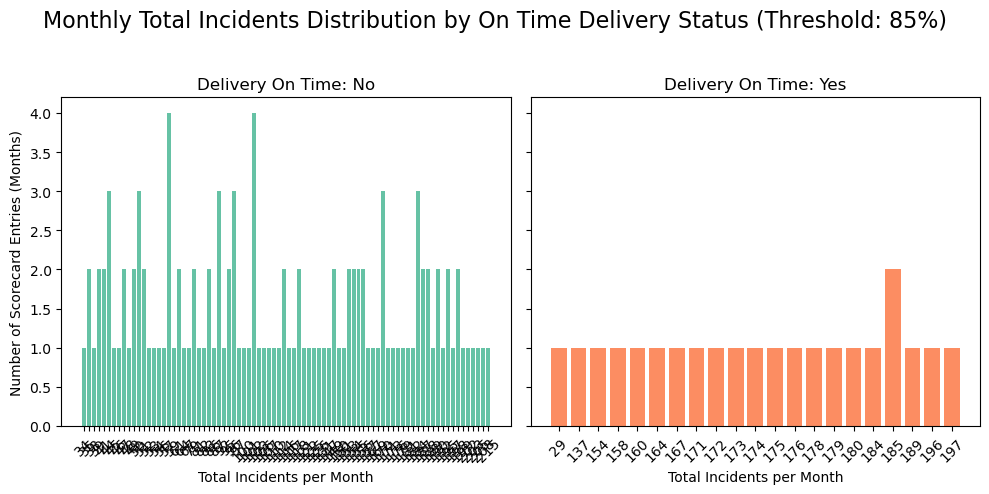


Average Monthly Total Incidents by On Time Delivery Status (Threshold: 85%):
OnTimeDeliveryStatus  AvgTotalIncidents
                 Yes         167.409091
                  No         115.303279

Total Incidents Sum by On Time Delivery Status (Threshold: 85%):
OnTimeDeliveryStatus  TotalIncidentsSum
                  No              14067
                 Yes               3683


In [33]:
# reminders by supplier when on time vs when not on time

# Ensure the OnTimeDeliveryStatus column exists (created in cell 54)
if "OnTimeDeliveryStatus" not in df_supplier_scorecard.columns:
    # Define threshold for On-Time Delivery if not already defined or if running this cell independently
    if 'ON_TIME_THRESHOLD' not in globals():
        ON_TIME_THRESHOLD = 85 # Default threshold if not set previously
        print(f"Warning: ON_TIME_THRESHOLD not found, using default value: {ON_TIME_THRESHOLD}%")

    df_supplier_scorecard = df_supplier_scorecard.with_columns(
        (pl.col("OnTimeDeliveryRate (%)") >= ON_TIME_THRESHOLD).alias("OnTimeDeliveryStatus")
)

# Group by OnTimeDeliveryStatus and TotalIncidents
df_incidents_ontime = df_supplier_scorecard.group_by(["OnTimeDeliveryStatus", "TotalIncidents"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Calculate total per ontime delivery status
total_incidents_ontime = df_incidents_ontime.groupby("OnTimeDeliveryStatus")["NumRecords"].sum().to_dict()
df_incidents_ontime["Percentage"] = df_incidents_ontime.apply(
    lambda row: row["NumRecords"] / total_incidents_ontime[row["OnTimeDeliveryStatus"]] * 100, axis=1
)

# Map boolean status to Yes/No for plotting
df_incidents_ontime["OnTimeDeliveryStatusLabel"] = df_incidents_ontime["OnTimeDeliveryStatus"].map({True: 'Yes', False: 'No'})

# Set up subplots
ontime_status_labels = sorted(df_incidents_ontime["OnTimeDeliveryStatusLabel"].unique())
num_ontime_status = len(ontime_status_labels)
fig, axes = plt.subplots(1, num_ontime_status, figsize=(5 * num_ontime_status, 5), sharey=True)
colors = plt.cm.Set2.colors
color_map = {label: colors[i % len(colors)] for i, label in enumerate(ontime_status_labels)}

# Plot per ontime delivery status label
for i, status_label in enumerate(ontime_status_labels):
    ax = axes[i] if num_ontime_status > 1 else axes
    # Sort data by TotalIncidents for better x-axis ordering
    data = df_incidents_ontime[df_incidents_ontime["OnTimeDeliveryStatusLabel"] == status_label].sort_values("TotalIncidents", ascending=True)
    bars = ax.bar(data["TotalIncidents"].astype(str), data["NumRecords"], color=color_map[status_label]) # Convert x-axis to string
    ax.set_title(f"Delivery On Time: {status_label}")
    ax.set_xlabel("Total Incidents per Month")
    if i == 0:
        ax.set_ylabel("Number of Scorecard Entries (Months)")
    ax.tick_params(axis='x', rotation=45)

# Final layout
plt.suptitle(f"Monthly Total Incidents Distribution by On Time Delivery Status (Threshold: {ON_TIME_THRESHOLD}%)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Average number of total incidents when on time vs when not on time
df_incidents_ontime_avg = df_supplier_scorecard.group_by(["OnTimeDeliveryStatus"]).agg([
    pl.mean("TotalIncidents").alias("AvgTotalIncidents")
]).to_pandas()
# Map boolean to Yes/No
df_incidents_ontime_avg["OnTimeDeliveryStatus"] = df_incidents_ontime_avg["OnTimeDeliveryStatus"].map({True: 'Yes', False: 'No'})
df_incidents_ontime_avg = df_incidents_ontime_avg.sort_values(by="AvgTotalIncidents", ascending=False)
print(f"\nAverage Monthly Total Incidents by On Time Delivery Status (Threshold: {ON_TIME_THRESHOLD}%):")
print(df_incidents_ontime_avg.to_string(index=False))

# Total number of incidents when on time vs when not on time
df_incidents_ontime_total = df_supplier_scorecard.group_by(["OnTimeDeliveryStatus"]).agg([
    pl.sum("TotalIncidents").alias("TotalIncidentsSum")
]).to_pandas()
# Map boolean to Yes/No
df_incidents_ontime_total["OnTimeDeliveryStatus"] = df_incidents_ontime_total["OnTimeDeliveryStatus"].map({True: 'Yes', False: 'No'})
df_incidents_ontime_total = df_incidents_ontime_total.sort_values(by="TotalIncidentsSum", ascending=False)
print(f"\nTotal Incidents Sum by On Time Delivery Status (Threshold: {ON_TIME_THRESHOLD}%):")
print(df_incidents_ontime_total.to_string(index=False))

 #### 4.7 Total Cost  by Supplier 

In [34]:
#total cost by supplier (sum of average cost per incident over the months)
df_total_cost = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.sum("AverageCostPerIncident (€)").alias("TotalCost") # Use the correct column name
]).to_pandas()
df_total_cost = df_total_cost.sort_values(by="TotalCost", ascending=False) # Sort by the correct alias
print("Total Average Cost Per Incident Sum per Supplier (over all months):")
print(df_total_cost.to_string(index=False))

Total Average Cost Per Incident Sum per Supplier (over all months):
SupplierName  TotalCost
   SupplierH   11270.89
   SupplierG   10581.87
   SupplierF   10398.50
   SupplierA   10145.27
   SupplierB    9903.06
   SupplierC    9734.74
   SupplierD    9614.88
   SupplierE    9578.71



 #### 4.8 Distributions

/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


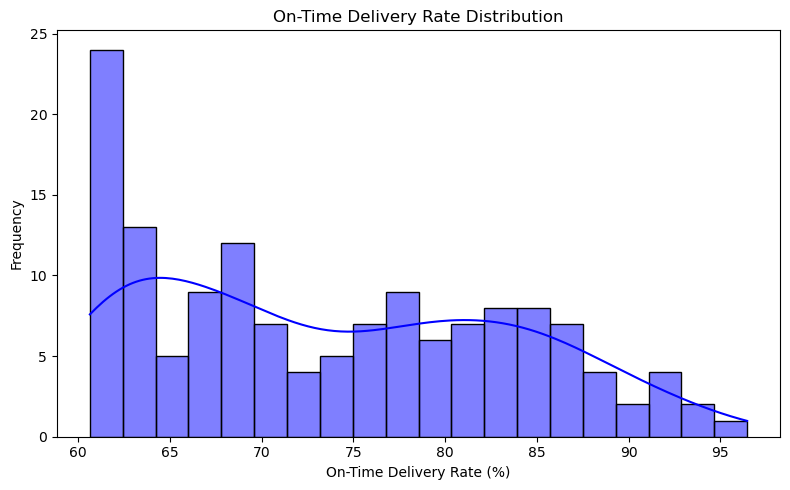

In [35]:
# On-Time Delivery Rate distribution (as 'AdherenceScore' column does not exist)
# Select the 'OnTimeDeliveryRate (%)' column
df_ontime_distribution = df_supplier_scorecard.select(["OnTimeDeliveryRate (%)"]).to_pandas()
# Rename the column for easier plotting
df_ontime_distribution = df_ontime_distribution.rename(columns={"OnTimeDeliveryRate (%)": "OnTimeDeliveryRate"})

plt.figure(figsize=(8, 5))
# Plot the distribution of 'OnTimeDeliveryRate'
sns.histplot(df_ontime_distribution, x="OnTimeDeliveryRate", bins=20, kde=True, color='blue')
plt.title("On-Time Delivery Rate Distribution")
plt.xlabel("On-Time Delivery Rate (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


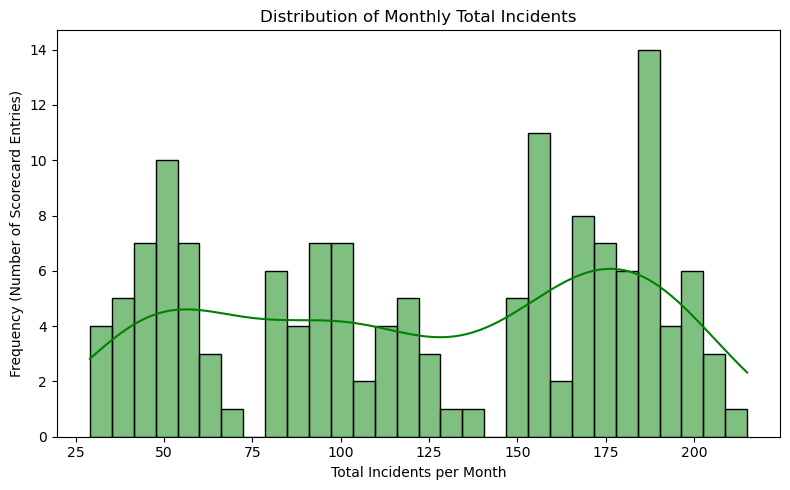

In [36]:
# Total Incidents distribution (as 'NumberOfReminders' does not exist)
df_incidents_distribution = df_supplier_scorecard.select(["TotalIncidents"]).to_pandas()
plt.figure(figsize=(8, 5))
sns.histplot(df_incidents_distribution, x="TotalIncidents", bins=30, kde=True, color='green') # Adjusted bins
plt.title("Distribution of Monthly Total Incidents")
plt.xlabel("Total Incidents per Month")
plt.ylabel("Frequency (Number of Scorecard Entries)")
plt.tight_layout()
plt.show()

/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


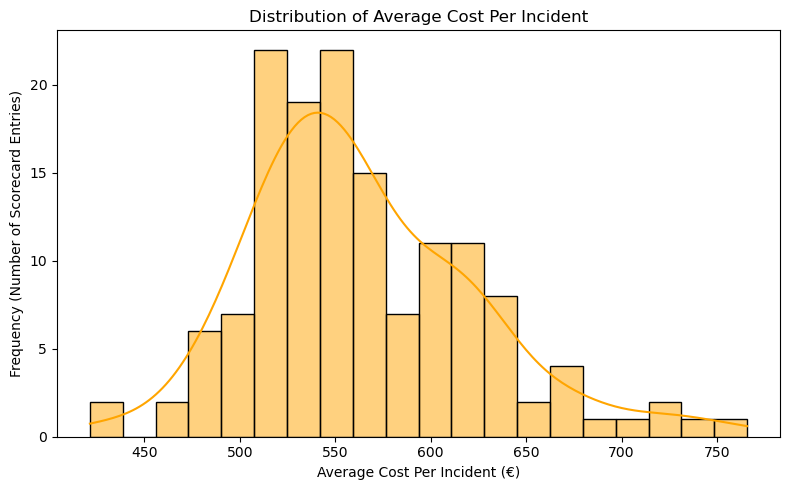

In [37]:
# Average Cost Per Incident distribution
# Select the 'AverageCostPerIncident (€)' column
df_cost_distribution = df_supplier_scorecard.select(["AverageCostPerIncident (€)"]).to_pandas()
# Rename the column for easier plotting
df_cost_distribution = df_cost_distribution.rename(columns={"AverageCostPerIncident (€)": "AverageCostPerIncident"})

plt.figure(figsize=(8, 5))
# Plot the distribution of 'AverageCostPerIncident'
sns.histplot(df_cost_distribution, x="AverageCostPerIncident", bins=20, kde=True, color='orange')
plt.title("Distribution of Average Cost Per Incident")
plt.xlabel("Average Cost Per Incident (€)")
plt.ylabel("Frequency (Number of Scorecard Entries)")
plt.tight_layout()
plt.show()

/Users/ulisesgordillo/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


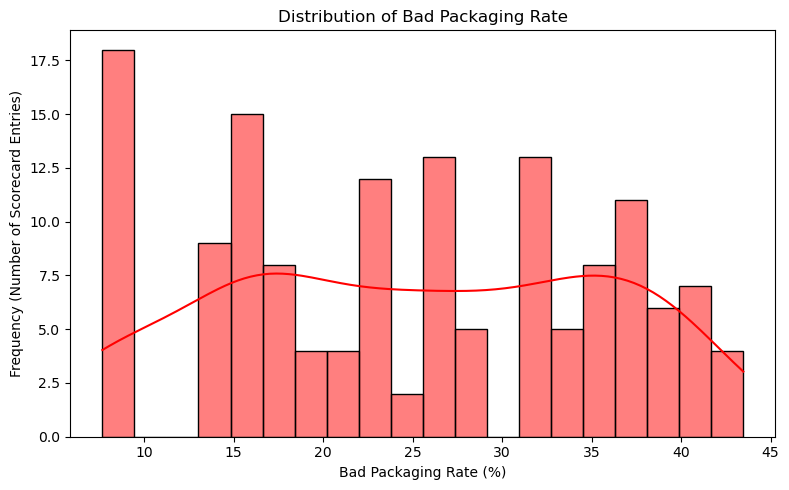

In [38]:
#bad packaging rate distribution
df_bad_packaging_distribution = df_supplier_scorecard.select(["BadPackagingRate (%)"]).to_pandas()
# Rename the column for easier plotting
df_bad_packaging_distribution = df_bad_packaging_distribution.rename(columns={"BadPackagingRate (%)": "BadPackagingRate"})
plt.figure(figsize=(8, 5))
# Plot the distribution of 'BadPackagingRate'
sns.histplot(df_bad_packaging_distribution, x="BadPackagingRate", bins=20, kde=True, color='red')
plt.title("Distribution of Bad Packaging Rate")
plt.xlabel("Bad Packaging Rate (%)")
plt.ylabel("Frequency (Number of Scorecard Entries)")
plt.tight_layout()
plt.show()
